In [1]:
import numpy as np
import pandas as pd
import os

# remove war
import warnings
warnings.filterwarnings('ignore')

# this will allow ploting inside the notebook
%matplotlib inline

# Data Preprocessing

In [2]:
folder_path = r'D:\Datasets'

# Specify the file names
business_file = 'yelp_academic_dataset_business.csv'
review_file = 'yelp_academic_dataset_review.csv'
user_file = 'yelp_academic_dataset_user.csv'

# Combine the folder path and file names to create the full file paths
business_path = os.path.join(folder_path, business_file)
review_path = os.path.join(folder_path, review_file)
user_path = os.path.join(folder_path, user_file)

# Read the CSV files into DataFrame using the full file paths
business = pd.read_csv(business_path, index_col=0, usecols=['business_id', 'name', 'attributes', 'categories', 'stars'], nrows=10000)
review = pd.read_csv(review_path, index_col=0, usecols=['user_id', 'business_id', 'stars'], nrows=10000)
user = pd.read_csv(user_path, index_col=0, usecols=['user_id', 'name'], nrows=10000)

In [3]:
# Function that extract keys from the nested dictionary
import json
def extract_keys(attr, key):
    if attr == None or pd.isna(attr):
        return "{}"
    if key in attr:
        try:
            return ast.literal_eval(attr)[key]
        except:
            return "{}"

# convert string to dictionary
import ast
def str_to_dict(attr):
    if attr != None:
        return attr
    else:
        return {}

In [4]:
# extract values from nested attributes
business['BusinessParking'] = business.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'BusinessParking')), axis=1)
business['Ambience'] = business.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Ambience')), axis=1)
business['GoodForMeal'] = business.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'GoodForMeal')), axis=1)
business['Dietary'] = business.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Dietary')), axis=1)
business['Music'] = business.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Music')), axis=1)
business['ByAppointmentOnly'] = business.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'ByAppointmentOnly')), axis=1)

In [6]:
# create table with attribute dummies
df_attr = pd.concat([ business['attributes'].apply(pd.Series), business['BusinessParking'].apply(pd.Series),
                    business['Ambience'].apply(pd.Series), business['GoodForMeal'].apply(pd.Series), 
                    business['Dietary'].apply(pd.Series) ], axis=1)
df_attr_dummies = pd.get_dummies(df_attr)
df_attr_dummies

,"0_{'AcceptsInsurance': 'False', 'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'True', 'BusinessParking': ""{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"", 'ByAppointmentOnly': 'True', 'WiFi': ""u'free'"", 'WheelchairAccessible': 'True'}","0_{'AcceptsInsurance': 'False', 'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'True', 'BikeParking': 'True', 'WiFi': ""u'free'"", 'WheelchairAccessible': 'True'}","0_{'AcceptsInsurance': 'False', 'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'True', 'WiFi': ""u'no'""}","0_{'AcceptsInsurance': 'False', 'BusinessAcceptsCreditCards': 'True', 'WiFi': ""u'free'""}","0_{'AcceptsInsurance': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"", 'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'True', 'ByAppointmentOnly': 'False', 'RestaurantsPriceRange2': '2'}","0_{'AcceptsInsurance': 'False', 'ByAppointmentOnly': 'True', 'WiFi': ""u'free'"", 'BusinessAcceptsCreditCards': 'True'}","0_{'AcceptsInsurance': 'False', 'Smoking': 'None', 'WiFi': 'None', 'BusinessParking': 'None', 'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'True'}","0_{'AcceptsInsurance': 'False', 'WiFi': ""u'free'"", 'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'True', 'WheelchairAccessible': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'BikeParking': 'True'}","0_{'AcceptsInsurance': 'True', 'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'False'}","0_{'AcceptsInsurance': 'True', 'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'True', 'WheelchairAccessible': 'True'}",...,"0_{u'breakfast': True, u'brunch': True, u'lunch': None, u'dinner': None, u'latenight': False, u'dessert': False}","0_{u'breakfast': True, u'brunch': True, u'lunch': None, u'dinner': None, u'latenight': None, u'dessert': None}","0_{u'breakfast': True, u'brunch': True, u'lunch': True, u'dinner': False, u'latenight': False, u'dessert': None}","0_{u'breakfast': True, u'brunch': True, u'lunch': True, u'dinner': None, u'latenight': False, u'dessert': False}","0_{u'breakfast': True, u'brunch': True, u'lunch': True, u'dinner': None, u'latenight': False, u'dessert': None}","0_{u'breakfast': True, u'brunch': True, u'lunch': True, u'dinner': None, u'latenight': None, u'dessert': None}","0_{u'breakfast': True, u'brunch': True, u'lunch': True, u'dinner': True, u'latenight': False, u'dessert': None}","0_{u'breakfast': True, u'brunch': True, u'lunch': True, u'dinner': True, u'latenight': None, u'dessert': True}",0_{},0_{}
business_id,,,,,,,,,,,,,,,,,,,,,
Pns2l4eNsfO8kk83dixA6A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mpf3x-BjTdTEA3yCZrAYPw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tUFrWirKiKi_TAnsVWINQQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MTSW4McQd7CbVtyjqoe9mw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mWMc6_wTdE0EUBKIGXDVfA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pdin4DKMYBbXLXanNDNwLQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N-4ZOrM_qAnzBiCsJ7-ENA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KqvaJX11rb4Hp70D8Dw4oQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_categories_dummies = pd.Series(business['categories']).str.get_dummies(',')
df_categories_dummies

,& Probates,ATV Rentals/Tours,Acai Bowls,Accessories,Accountants,Acne Treatment,Active Life,Acupuncture,Addiction Medicine,Adult,...,Window Washing,Windows Installation,Windshield Installation & Repair,Wine Bars,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos
business_id,,,,,,,,,,,,,,,,,,,,,
Pns2l4eNsfO8kk83dixA6A,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
mpf3x-BjTdTEA3yCZrAYPw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tUFrWirKiKi_TAnsVWINQQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MTSW4McQd7CbVtyjqoe9mw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mWMc6_wTdE0EUBKIGXDVfA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pdin4DKMYBbXLXanNDNwLQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
N-4ZOrM_qAnzBiCsJ7-ENA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KqvaJX11rb4Hp70D8Dw4oQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# pull out names and stars from rest table 
result = business[['name','stars']]
result

,name,stars
business_id,,
Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",5.0
mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,3.0
tUFrWirKiKi_TAnsVWINQQ,Target,3.5
MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0
mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,4.5
...,...,...
Pdin4DKMYBbXLXanNDNwLQ,Knuckle Dusters Vapor,5.0
N-4ZOrM_qAnzBiCsJ7-ENA,Ricky's All Day Grill,3.0
KqvaJX11rb4Hp70D8Dw4oQ,Admirals Club PHL Terminal F,4.0


In [9]:
# Concat all tables and drop Restaurant column
df_final = pd.concat([df_attr_dummies, df_categories_dummies, result], axis=1)
df_final.drop('Restaurants',inplace=True,axis=1)

In [11]:
folder_path = r'D:\Datasets'
file_name = 'df_final.csv'

file_path = os.path.join(folder_path, file_name)

# Save the DataFrame to a CSV file
df_final.to_csv(file_path, index=False)

In [12]:
final_file = 'df_final.csv'

# Combine the folder path and file names to create the full file paths
final_path_new = os.path.join(folder_path, final_file)

df_final = pd.read_csv(final_path_new, engine = 'python')

In [13]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_df_final, test_df_final = train_test_split(df_final, test_size=0.2, random_state=1)


In [14]:
df_final.head(5)

,"0_{'AcceptsInsurance': 'False', 'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'True', 'BusinessParking': ""{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}"", 'ByAppointmentOnly': 'True', 'WiFi': ""u'free'"", 'WheelchairAccessible': 'True'}","0_{'AcceptsInsurance': 'False', 'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'True', 'BikeParking': 'True', 'WiFi': ""u'free'"", 'WheelchairAccessible': 'True'}","0_{'AcceptsInsurance': 'False', 'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'True', 'WiFi': ""u'no'""}","0_{'AcceptsInsurance': 'False', 'BusinessAcceptsCreditCards': 'True', 'WiFi': ""u'free'""}","0_{'AcceptsInsurance': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}"", 'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'True', 'ByAppointmentOnly': 'False', 'RestaurantsPriceRange2': '2'}","0_{'AcceptsInsurance': 'False', 'ByAppointmentOnly': 'True', 'WiFi': ""u'free'"", 'BusinessAcceptsCreditCards': 'True'}","0_{'AcceptsInsurance': 'False', 'Smoking': 'None', 'WiFi': 'None', 'BusinessParking': 'None', 'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'True'}","0_{'AcceptsInsurance': 'False', 'WiFi': ""u'free'"", 'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'True', 'WheelchairAccessible': 'False', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'BikeParking': 'True'}","0_{'AcceptsInsurance': 'True', 'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'False'}","0_{'AcceptsInsurance': 'True', 'BusinessAcceptsCreditCards': 'True', 'ByAppointmentOnly': 'True', 'WheelchairAccessible': 'True'}",...,Windshield Installation & Repair,Wine Bars,Wineries,Women's Clothing,Wraps,Yelp Events,Yoga,Zoos,name,stars
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"Abby Rappoport, LAC, CMQ",5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,The UPS Store,3.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Target,3.5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,St Honore Pastries,4.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Perkiomen Valley Brewery,4.5


# KNN

In [15]:
# Create X (all the features) and y (target)
X_train = train_df_final.iloc[:,:-2]
y_train = train_df_final['stars']
X_test = test_df_final.iloc[:,:-2]
y_test = test_df_final['stars']

In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

accuracy_train = knn.score(X_train, y_train)
accuracy_test = knn.score(X_test, y_test)

print(f"Score on training set: {accuracy_train}")
print(f"Score on test set: {accuracy_test}")

Score on training set: 0.3538484877861374
Score on test set: 0.015490117512595214


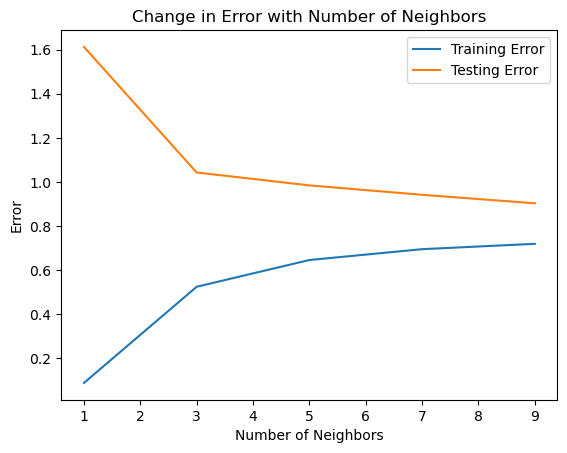

Results Table:
   n_neighbors   weights  train_error  test_error
0            3   uniform     0.498559    0.992278
1            3  distance     0.049337    1.001864
2            5   uniform     0.613729    0.936755
3            5  distance     0.044811    0.944066
4            7   uniform     0.660387    0.896043
5            7  distance     0.043705    0.899833

Best Parameters:
{'n_neighbors': 7, 'weights': 'uniform'}


In [15]:
import matplotlib.pyplot as plt
# Visualize Error Change Over Iterations for KNN
n_neighbors_values = [1, 3, 5, 7, 9]

train_errors = []
test_errors = []

for n_neighbors in n_neighbors_values:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    train_error = 1 - knn.score(X_train, y_train)
    test_error = 1 - knn.score(X_test, y_test)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(n_neighbors_values, train_errors, label='Training Error')
plt.plot(n_neighbors_values, test_errors, label='Testing Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.title('Change in Error with Number of Neighbors')
plt.legend()
plt.show()

# Systematic Testing with Multiple Hyperparameters for KNN
from sklearn.metrics import mean_squared_error

n_neighbors_values = [3, 5, 7]
weight_options = ['uniform', 'distance']

best_error = float('inf')
best_params = None

results = []

for n_neighbors in n_neighbors_values:
    for weight in weight_options:
        knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weight)
        knn.fit(X_train, y_train)
        
        train_error = mean_squared_error(y_train, knn.predict(X_train))
        test_error = mean_squared_error(y_test, knn.predict(X_test))
        
        results.append({'n_neighbors': n_neighbors, 'weights': weight, 'train_error': train_error, 'test_error': test_error})
        
        if test_error < best_error:
            best_error = test_error
            best_params = {'n_neighbors': n_neighbors, 'weights': weight}

results_df = pd.DataFrame(results)
print("Results Table:")
print(results_df)

print("\nBest Parameters:")
print(best_params)

# Collaborative Filtering

In [17]:
# create numerical user and business as uid and pid

user_reset = user.reset_index()
user_reset = user_reset.reset_index().rename(columns={'index': 'uid'})
user_reset.head()


,uid,user_id,name
0,0,qVc8ODYU5SZjKXVBgXdI7w,Walker
1,1,j14WgRoU_-2ZE1aw1dXrJg,Daniel
2,2,2WnXYQFK0hXEoTxPtV2zvg,Steph
3,3,SZDeASXq7o05mMNLshsdIA,Gwen
4,4,hA5lMy-EnncsH4JoR-hFGQ,Karen


In [18]:
business_reset = business.reset_index()
business_reset = business_reset.reset_index().rename(columns={'index': 'pid'})
business_reset.head()

,pid,business_id,name,stars,attributes,categories,BusinessParking,Ambience,GoodForMeal,Dietary,Music,ByAppointmentOnly
0,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",5.0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",{},{},{},{},{},True
1,1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,3.0,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...",{},{},{},{},{},{}
2,2,tUFrWirKiKi_TAnsVWINQQ,Target,3.5,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'garage': False, 'street': False, 'validated'...",{},{},{},{},False
3,3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,4.0,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'garage': False, 'street': True, 'validated':...",{},{},{},{},False
4,4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,4.5,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'garage': None, 'street': None, 'validated': ...",{},{},{},{},{}


In [19]:
review.head()

,business_id,stars
user_id,,
mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0
OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0
8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0
_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0
bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0


In [20]:
# Merge review with user on user_id column
review_user = review.merge(user_reset, on='user_id', how='outer')
review_user.tail()

,user_id,business_id,stars,uid,name
19238,iJ49Vf4yOg5uVqNFCk5q-g,NaN,NaN,9994.0,Armand
19239,Ry6R2TMTQOInMXJR2TJh4w,NaN,NaN,9995.0,Allen
19240,nbF6fWySgbbD15TGSOKN6Q,NaN,NaN,9997.0,Britta
19241,rVuP6BdGt_8QF7PA0kRyvQ,NaN,NaN,9998.0,Nel
19242,fPvAAXp-B-fTS3_HOxvqlg,NaN,NaN,9999.0,Jon


In [21]:
# Merge review_user with business on business_id column
review_final = review_user.merge(business_reset, on='business_id', how='outer')
review_final = review_final.dropna()
review_final.head()

,user_id,business_id,stars_x,uid,name_x,pid,name_y,stars_y,attributes,categories,BusinessParking,Ambience,GoodForMeal,Dietary,Music,ByAppointmentOnly
9,mqBWACmaHflW4eh_Ofp16Q,kxX2SOes4o-D3ZQBkiMRfA,5.0,8155.0,Igor,6316.0,Zaika,4.0,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'garage': False, 'street': False, 'validated'...","{'romantic': False, 'intimate': False, 'touris...","{'dessert': False, 'latenight': False, 'lunch'...",{},{},False
77,4Uh27DgGzsp6PqrH913giQ,otQS34_MymijPTdNBoBdCw,4.0,1029.0,Goldie,5077.0,BK Tacos,4.0,"{'RestaurantsTakeOut': 'True', 'HasTV': 'True'...","Restaurants, Tacos, Mexican, Hot Dogs, Breakfa...","{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': None, 'latenight': None, 'lunch': ...",{},{},False
82,NiEs4XaVXTPLPCvuBu0DpA,otQS34_MymijPTdNBoBdCw,3.0,7445.0,Andrew,5077.0,BK Tacos,4.0,"{'RestaurantsTakeOut': 'True', 'HasTV': 'True'...","Restaurants, Tacos, Mexican, Hot Dogs, Breakfa...","{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': None, 'latenight': None, 'lunch': ...",{},{},False
84,4Uh27DgGzsp6PqrH913giQ,Y3ZCO17N1_T_Ms1JmswwzA,4.0,1029.0,Goldie,1569.0,Taqueria Pico De Gallo,4.0,"{'RestaurantsGoodForGroups': 'True', 'Caters':...","Mexican, Restaurants","{'garage': False, 'street': False, 'validated'...","{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",{},{},{}
165,Seq38L70mTIRtNUPeh-ITA,S2Ho8yLxhKAa26pBAm6rxA,1.0,3989.0,Ting Ting,6095.0,Creole House Restaurant & Oyster Bar,4.0,"{'WiFi': ""'free'"", 'RestaurantsAttire': ""u'cas...","Cajun/Creole, Seafood, Restaurants, Breakfast ...","{'garage': False, 'street': True, 'validated':...","{'touristy': True, 'hipster': False, 'romantic...","{'dessert': None, 'latenight': True, 'lunch': ...",{},{},False


In [22]:
# save the produced dataframe

new_file = 'review_final.csv'
new_review_file_path = os.path.join(folder_path, new_file)
review_final.to_csv(new_review_file_path)

In [23]:
# read it back
review_final = pd.read_csv(new_review_file_path)

In [24]:
from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(review_final, test_size=0.2)  # You can adjust the test_size

In [25]:
# convert to (userID, productID, rating) tuple for train set

from tqdm.notebook import tqdm

trainset_tuples = []
for _, row in tqdm(trainset.iterrows()):
    try:
        trainset_tuples.append((int(row['uid']), int(row['pid']), row['stars_x']))
    except Exception as e:
        print(e)
        break

0it [00:00, ?it/s]

In [26]:
# convert to (userID, productID, rating) tuple for test set

from tqdm.notebook import tqdm

testset_tuples = []
for _, row in tqdm(testset.iterrows()):
    try:
        testset_tuples.append((int(row['uid']), int(row['pid']), row['stars_x']))
    except Exception as e:
        pass

0it [00:00, ?it/s]

In [27]:
import os
import sys

# set env to make PYSPARK connection more stable
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
os.environ['SPARK_MASTER_HOST'] = 'localhost'
os.environ['SPARK_LOCAL_IP'] = '127.0.0.1'

In [28]:
from pyspark.sql import SparkSession
from pyspark import SparkConf

conf = SparkConf()
conf.set('spark.logConf', 'true')
conf.set('spark.driver.memory', '15g')

# Create a Spark session
spark = SparkSession.builder.config(conf=conf).getOrCreate()
spark.sparkContext.setLogLevel("OFF")

# Convert the list of tuples to an RDD using parallelize()
train_rdd = spark.sparkContext.parallelize(trainset_tuples)

# Convert the list of tuples to an RDD using parallelize()
test_rdd = spark.sparkContext.parallelize(testset_tuples)

In [29]:
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

# Build the recommendation model using Alternating Least Squares
rank = 5
numIterations = 20
model = ALS.train(train_rdd, rank, numIterations, nonnegative=True)

In [30]:
# Evaluate the model on training data
testdata = test_rdd.map(lambda p: (p[0], p[1]))
predictions = model.predictAll(testdata).map(lambda r: ((r[0], r[1]), r[2]))
ratesAndPreds = test_rdd.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)
MSE = ratesAndPreds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error = " + str(MSE))

Mean Squared Error = 6.787585244850755


In [31]:
# convert RDD to python list
pred = ratesAndPreds.map(lambda r: r[1][0]).collect()
gt = ratesAndPreds.map(lambda r: r[1][1]).collect()

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

# compute cosine similarity
cosine_similarity([pred, gt])

array([[1.        , 0.81075882],
       [0.81075882, 1.        ]])

In [41]:
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating

# Save and load model

#model.save(spark.sparkContext, "myCollaborativeFilter2")
#model = MatrixFactorizationModel.load(spark.sparkContext, "myCollaborativeFilter2")

# Example to Recommend for One User

In [38]:
# let's recommend for user 8155
rec_user = review_final[review_final['uid'] == 8155]
rec_user

,Unnamed: 0,user_id,business_id,stars_x,uid,name_x,pid,name_y,stars_y,attributes,categories,BusinessParking,Ambience,GoodForMeal,Dietary,Music,ByAppointmentOnly
0,9,mqBWACmaHflW4eh_Ofp16Q,kxX2SOes4o-D3ZQBkiMRfA,5.0,8155.0,Igor,6316.0,Zaika,4.0,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'garage': False, 'street': False, 'validated'...","{'romantic': False, 'intimate': False, 'touris...","{'dessert': False, 'latenight': False, 'lunch'...",{},{},False


In [39]:
# create the input data for user 4 to trigger recommendations
pred_list = []
for pid in range(int(review_final['pid'].max())):
    pred_list.append((6, pid))
pred_rdd = spark.sparkContext.parallelize(pred_list)
predictions = model.predictAll(pred_rdd).map(lambda r: (r[0], r[1], r[2]))

In [40]:
# sort the recommnedations by predicted stars
pred_res = predictions.collect()
pred_df = pd.DataFrame(pred_res, columns=['uid', 'pid', 'stars_x'])
merged = pred_df.merge(business_reset, on='pid', how='outer')
sorted_df = merged.sort_values(by='stars', ascending=False)
sorted_df.head()

,uid,stars_x,pid,business_id,name,stars,attributes,categories,BusinessParking,Ambience,GoodForMeal,Dietary,Music,ByAppointmentOnly
0,NaN,NaN,0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",5.0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",{},{},{},{},{},True
6068,NaN,NaN,6068,dVKHPRNhgpclJ-E2CoZiXA,Stuff'd Buns,5.0,"{'BikeParking': 'False', 'Alcohol': ""u'none'"",...","Food, Event Planning & Services, Caterers, Foo...",{},{},{},{},{},{}
6047,NaN,NaN,6047,8Mguc6RQc7td38CbJc7yyA,Salon Elements,5.0,"{'WheelchairAccessible': 'True', 'HairSpeciali...","Hair Removal, Waxing, Hair Salons, Hair Stylis...","{'garage': True, 'street': True, 'validated': ...",{},{},{},{},True
6050,NaN,NaN,6050,FDTwPQ4CNWEOY0rfh4eTzQ,ParadICE Hawaiian Shave Ice & Ice Cream,5.0,"{'DogsAllowed': 'True', 'BusinessAcceptsCredit...","Food, Caterers, Event Planning & Services, Ice...","{'garage': True, 'street': True, 'validated': ...",{},{},{},{},{}
6052,NaN,NaN,6052,SNndBdvDfflgNPKO74LmGw,Transformation Pet Center,5.0,NaN,"Veterinarians, Pet Sitting, Pets, Pet Services...",{},{},{},{},{},{}
